(-15.890625:0.25:15.859375, -15.890625:0.25:15.859375)


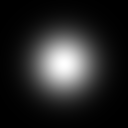

In [1]:
using SLMTools
N = 1024
# NSLM = 1024
# sz = (10, 10)
# sigma = 0.5
# define the SLM grid parameters. these are determined by the SLM itself
N_SLM_x = 1024 # number of rows in the SLM 
N_SLM_y = 1024 # number of columns in the SLM 
SLM_pixel_size = 17.0 # microns
L_SLM_pixels = (1:N_SLM_x, 1:N_SLM_y) # the SLM grid, in pixels
L_SLM_microns = ((L_SLM_pixels[1] .- N_SLM_x / 2) .* SLM_pixel_size, (L_SLM_pixels[2] .- N_SLM_y / 2) .* SLM_pixel_size) # the SLM grid, in microns, centered at the origin

# define the target grid parameters, these are dtermined by the camera used to measure the beam profile at the target plane
# the camera is assumed to be placed at the focal plane of a lens
# for this demonstration, we can imagine a fictional camera with whatever parameters we like
N_target_x = 1024 # number of rows in the target grid
N_target_y = 1024 # number of columns in the target grid
target_pixel_size = 17.0 # microns
L_target_pixels = (1:N_target_x, 1:N_target_y) # the target grid, in pixels
L_target_microns = ((L_target_pixels[1] .- N_target_x / 2) .* target_pixel_size, (L_target_pixels[2] .- N_target_y / 2) .* target_pixel_size) # the target grid, in microns

scale = 1
# beam0 = lfGaussian(Intensity, (N, N), 2000.0, L=L_SLM_microns)
beam0 = lfGaussian(Intensity, (N, N), 5.0 * scale, L=((-16.0:0.03125:15.96875) * scale, (-16.0:0.03125:15.96875) * scale))
# beam0 = lfGaussian(Intensity, (N, N), 5.0)
# beam0.L = (-16.0:0.03125:15.96875, -16.0:0.03125:15.96875)
dsbeam0 = coarsen(beam0, 8) # Make a 8x downsampled image
println(dsbeam0.L)
p1 = look(dsbeam0)

(-15.890625:0.25:15.859375, -15.890625:0.25:15.859375)


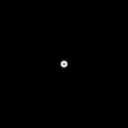

In [2]:
# target = lfRing(Intensity, (N, N), 0.5, 0.25)
# target = lfRing(Intensity, (N, N), 500, 250, L=L_target_microns)
target = lfRing(Intensity, (N, N), 0.5 * scale, 0.25 * scale, L=((-16.0:0.03125:15.96875) * scale, (-16.0:0.03125:15.96875) * scale))
p2 = look(target)
dstarget = coarsen(target, 8)
println(dstarget.L)
p3 = look(dstarget)

[0.0 3.1000062000124e-5 0.000124000248000496 0.000279000558001116 0.000496000992001984 0.0007750015500031 0.001116002232004464 0.001519003038006076 0.001984003968007936 0.002511005022010044; 3.1000062000124e-5 0.0 3.1000062000124e-5 0.000124000248000496 0.000279000558001116 0.000496000992001984 0.0007750015500031 0.001116002232004464 0.001519003038006076 0.001984003968007936; 0.000124000248000496 3.1000062000124e-5 0.0 3.1000062000124e-5 0.000124000248000496 0.000279000558001116 0.000496000992001984 0.0007750015500031 0.001116002232004464 0.001519003038006076; 0.000279000558001116 0.000124000248000496 3.1000062000124e-5 0.0 3.1000062000124e-5 0.000124000248000496 0.000279000558001116 0.000496000992001984 0.0007750015500031 0.001116002232004464; 0.000496000992001984 0.000279000558001116 0.000124000248000496 3.1000062000124e-5 0.0 3.1000062000124e-5 0.000124000248000496 0.000279000558001116 0.000496000992001984 0.0007750015500031; 0.0007750015500031 0.000496000992001984 0.000279000558001

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]

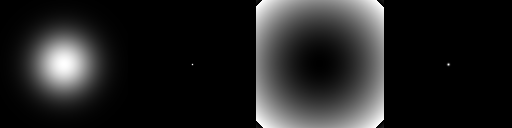

In [3]:
phi1 = otPhase(dsbeam0, dstarget, 0.05)
beam_out = sft(sqrt.(dsbeam0.data) .* exp.(2pi * im * phi1.data)) .^ 2 |> nabs
LFout = LatticeField{Intensity}(beam_out, dsbeam0.L);

beam0_out = sft(sqrt.(dsbeam0.data) .* exp.(0 * 2pi * im * phi1.data)) .^ 2 |> nabs
LF0out = LatticeField{Intensity}(beam0_out, dsbeam0.L);
# p7 = look(dsbeam0, LF0out, dstarget, phi1, LFout)
p7 = look(dsbeam0, LF0out,  phi1, LFout)